Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Exploratory Data Analysis

In [2]:
df = pd.read_csv('behavioural_dataset.csv')

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [4]:
df.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,2200000,1100000


In [5]:
df.shape

(99, 8)

In [6]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [8]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [9]:
df.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [10]:
df['Profession'].value_counts()

Profession
Salaried    64
Business    35
Name: count, dtype: int64

In [11]:
df['No of Dependents'].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

Demographic Segmentation using Profession and No of Dependent

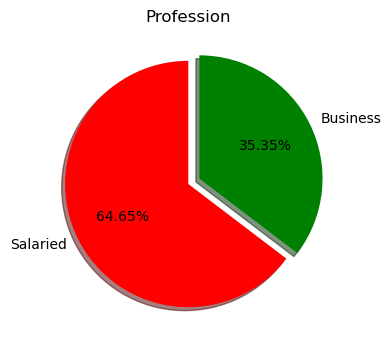

In [12]:
x = df['Profession'].value_counts()
labels = ['Salaried','Business']
colors = ['red','green']
explode = [0,0.1]
plt.figure(figsize=(4,4))
plt.pie(x,labels=labels,colors=colors,startangle=90,explode=explode,shadow=True,autopct = '%.2f%%')
plt.title("Profession")
plt.show()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_15572\3849548607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['No of Dependents'],palette='viridis')


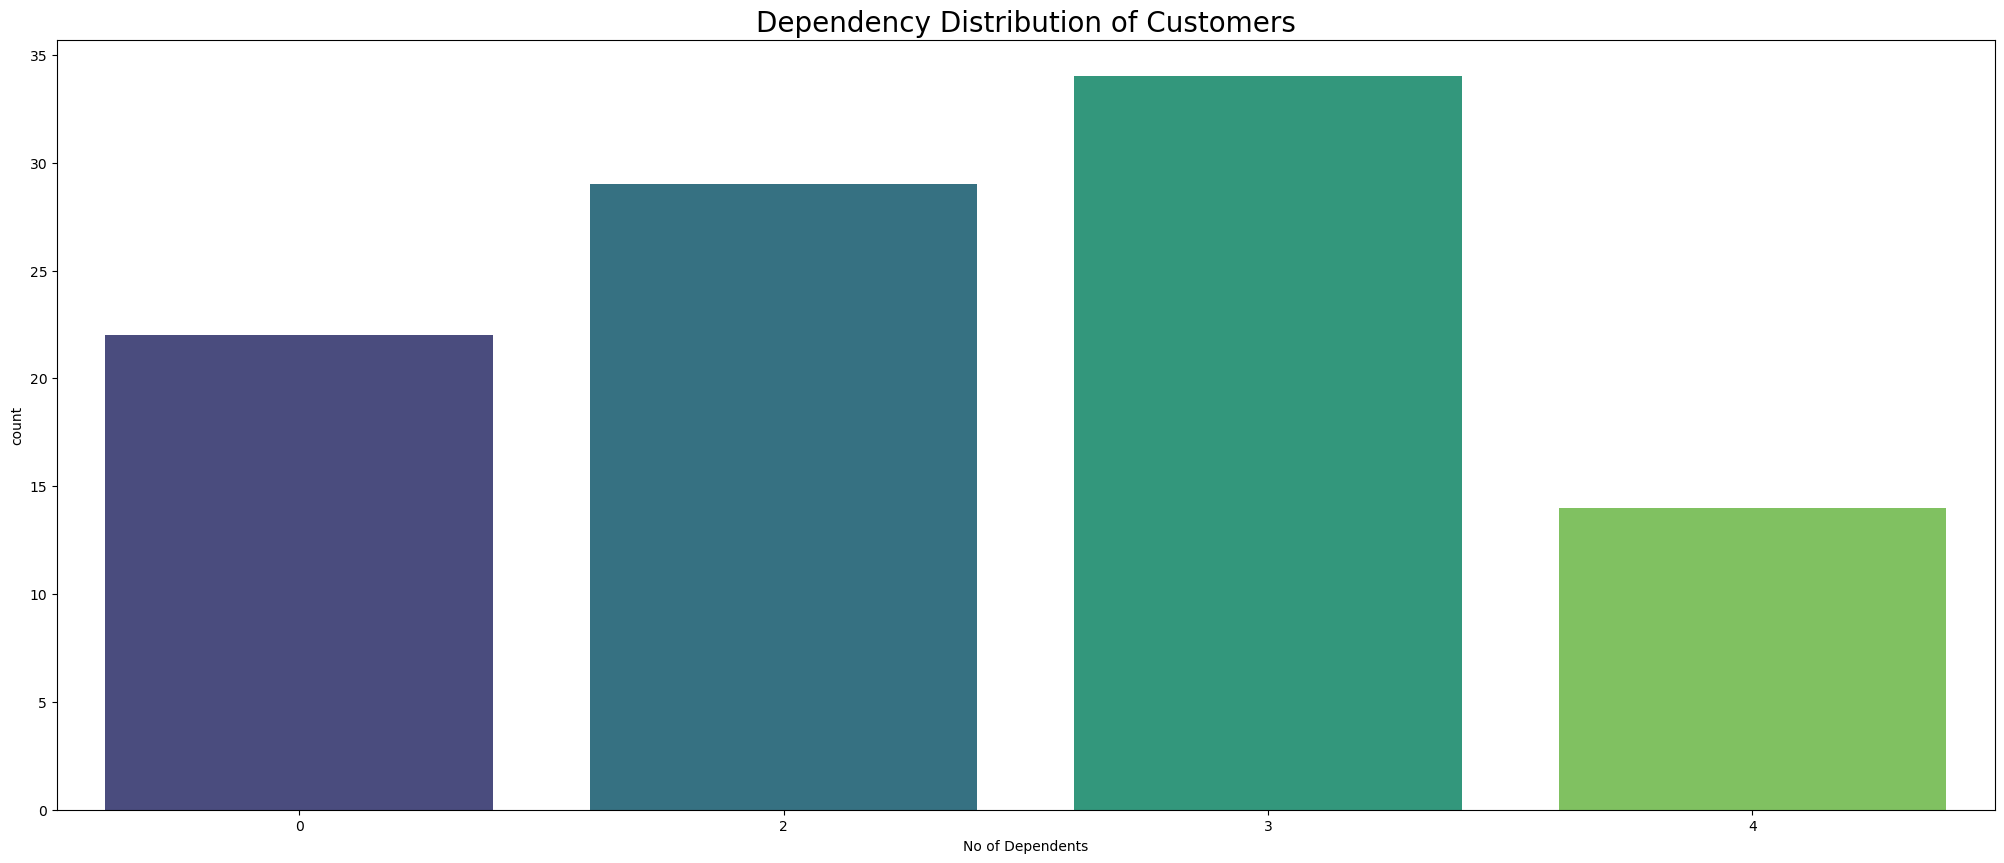

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['No of Dependents'],palette='viridis')
plt.title('Dependency Distribution of Customers', fontsize = 20)
plt.show()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_15572\2132487423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Age',palette='viridis')


<Axes: xlabel='Age', ylabel='count'>

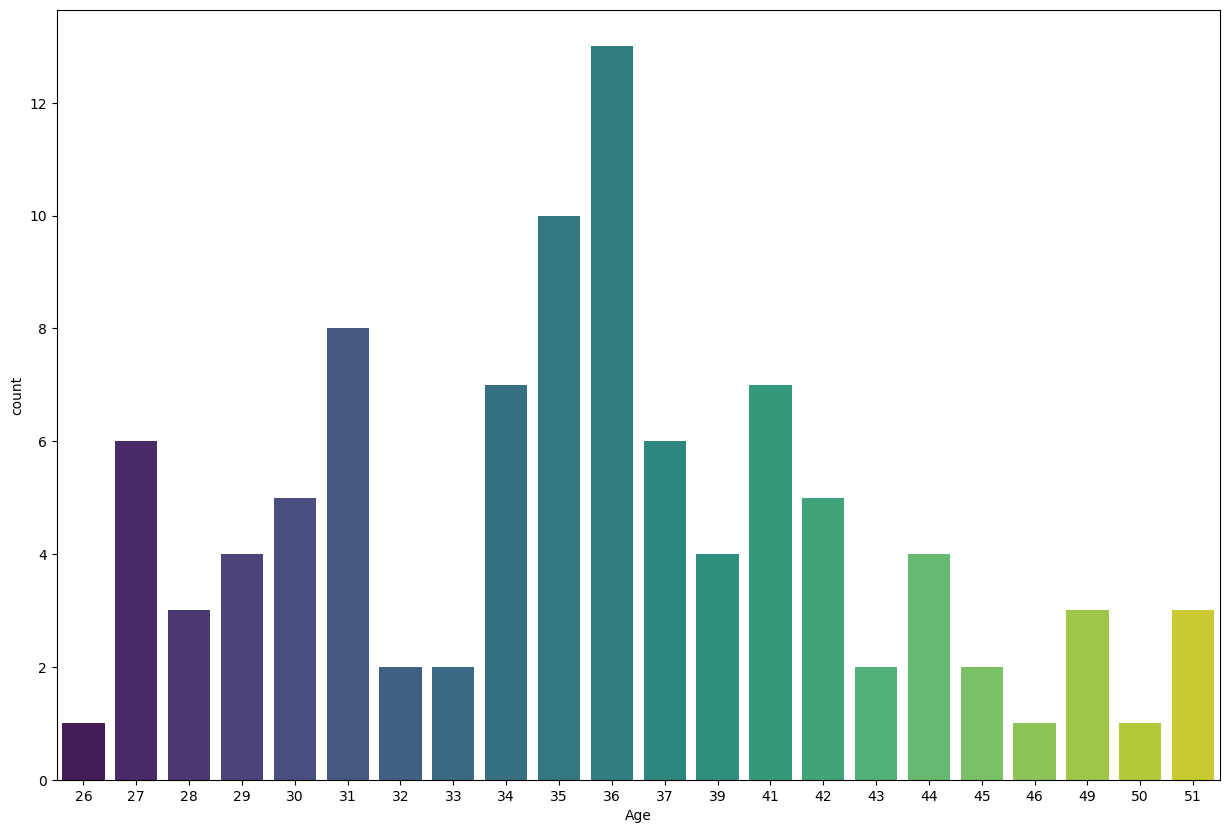

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Age',palette='viridis')

Data Preprocessing

In [15]:
df['Profession'] = LabelEncoder().fit_transform(df['Profession'])
df['Marrital Status'] = LabelEncoder().fit_transform(df['Marrital Status'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Personal loan'] = LabelEncoder().fit_transform(df['Personal loan'])

<Axes: >

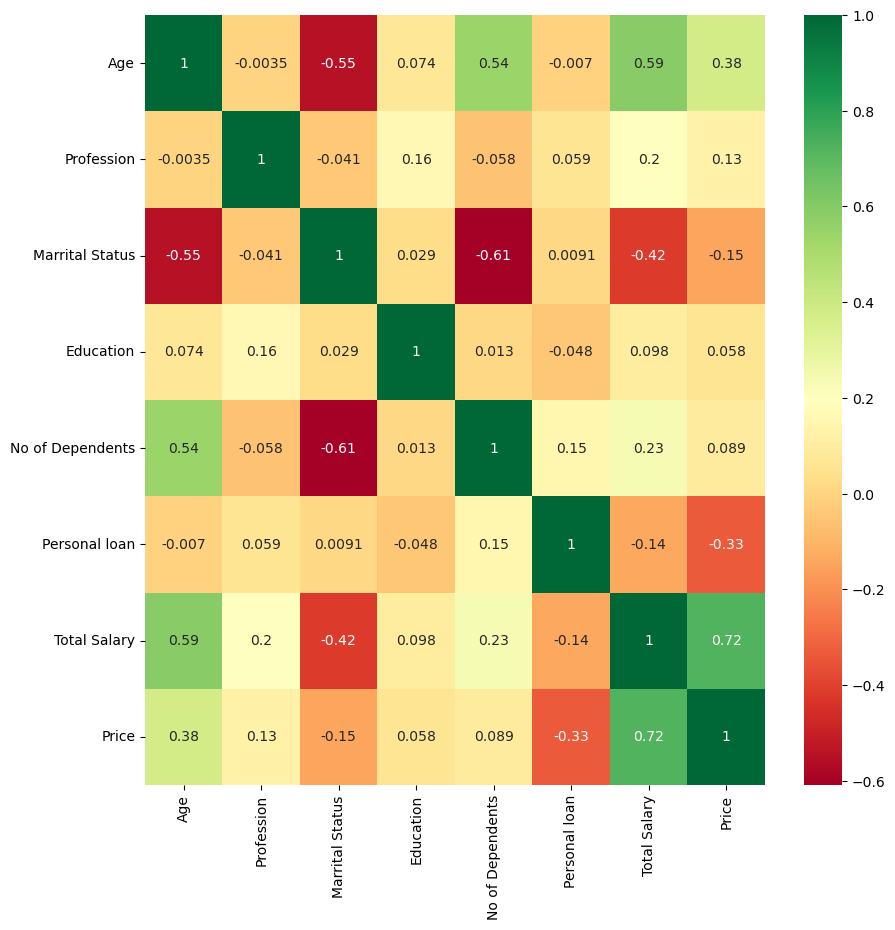

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [17]:
salary_median = df['Total Salary'].median()
df['Total Salary'] = df['Total Salary'].apply(lambda x:salary_median if x >= 4500000 else x)

<Axes: >

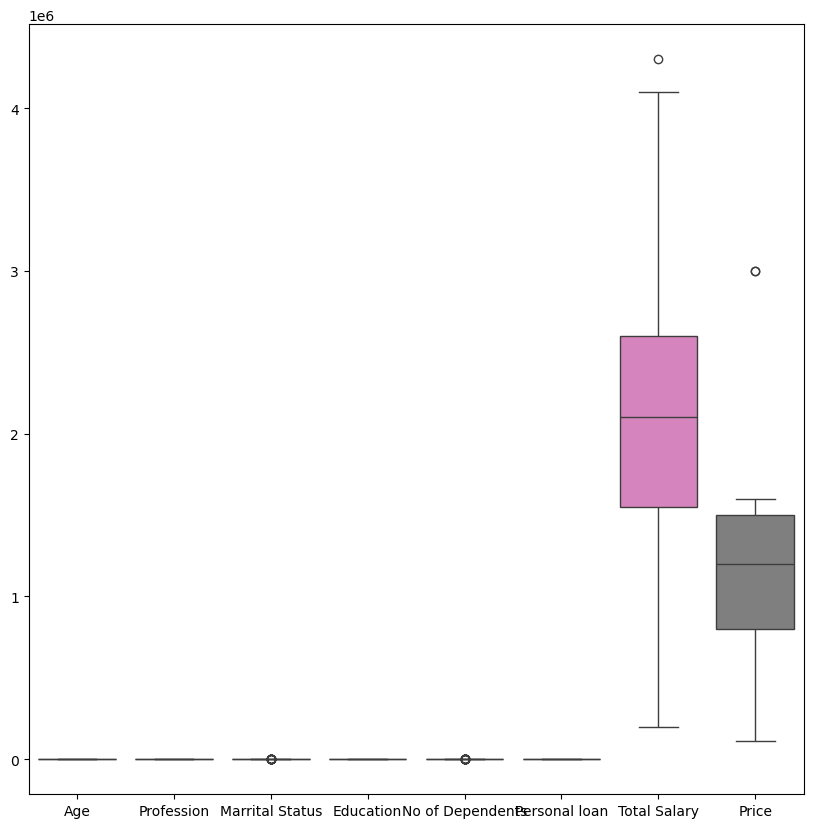

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [19]:
data = df.iloc[:,6:8]
print(data)

    Total Salary    Price
0       800000.0   800000
1      2000000.0  1000000
2      1800000.0  1200000
3      2200000.0  1200000
4      2600000.0  1600000
..           ...      ...
94     2400000.0  1600000
95     2100000.0  1600000
96     2200000.0  1100000
97     4000000.0  1500000
98     2200000.0  1100000

[99 rows x 2 columns]


Appling KMeans Algorithm

In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

c:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [21]:
print(wcss)

[85130947474747.48, 38564542897959.19, 22628690652074.785, 18001275799876.293, 13586222728689.42, 9203412411768.082, 7904165678340.221, 7289534237984.237, 5996423199023.199, 5203008280608.281]


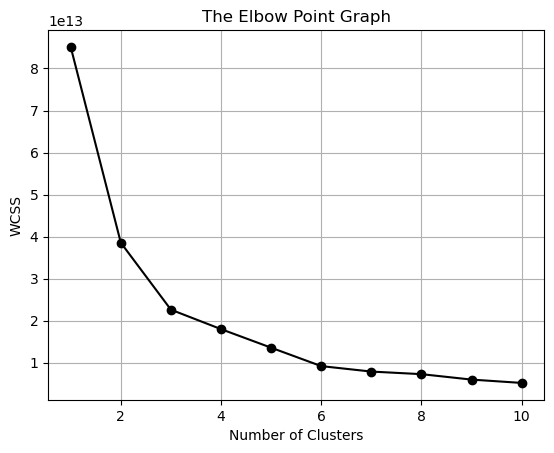

In [22]:
#plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',color='black')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data)

c:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [24]:
predict = kmeans.predict(data)
print(predict)

[1 0 0 0 2 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 2 0 0 1 0 2 1 1 2 2 1 0 2 0 0 3 0
 0 0 0 1 1 0 0 1 3 1 2 1 2 0 3 2 3 0 2 2 1 1 1 1 0 0 1 0 1 3 0 3 0 2 2 1 2
 0 3 0 2 2 0 0 0 0 2 2 1 1 0 3 1 1 0 2 1 0 0 0 3 0]


In [25]:
df['Cluster'] = predict
print(df.head())

   Age  Profession  Marrital Status  Education  No of Dependents  \
0   27           1                1          1                 0   
1   35           1                0          1                 2   
2   45           0                0          0                 4   
3   41           0                0          1                 3   
4   31           1                0          1                 2   

   Personal loan  Total Salary    Price  Cluster  
0              1      800000.0   800000        1  
1              1     2000000.0  1000000        0  
2              1     1800000.0  1200000        0  
3              0     2200000.0  1200000        0  
4              1     2600000.0  1600000        2  


In [26]:
sil_score = silhouette_score(data,predict)
print(f"Silhouette Score for KMeans: {sil_score}")

Silhouette Score for KMeans: 0.42513816481892736


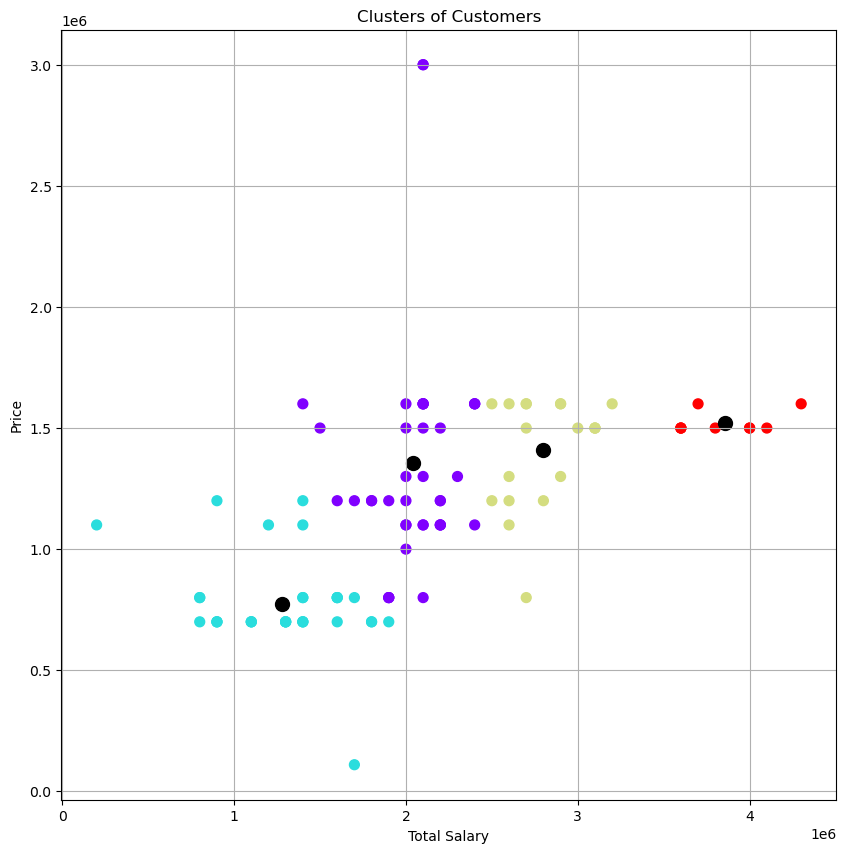

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(data.iloc[:,0],data.iloc[:,1],s=50,c=predict,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black')
plt.title('Clusters of Customers')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.grid()
plt.show()